# Researching the data set

In [99]:
# Importing possible needed libraries


import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from random import gauss
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from mpl_toolkits import mplot3d
import sklearn.metrics as metrics
import statsmodels.api as sm

import sys
import os
module_path = os.path.abspath(os.pardir)
if module_path not in sys.path:
    sys.path.append(module_path)

%matplotlib inline

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [2]:
df = pd.read_csv("data/kc_house_data.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
df["grade"]

0            7 Average
1            7 Average
2        6 Low Average
3            7 Average
4               8 Good
             ...      
21592           8 Good
21593           8 Good
21594        7 Average
21595           8 Good
21596        7 Average
Name: grade, Length: 21597, dtype: object

In [ ]:
df_copy['sqft_basement'].

In [149]:
df["sqft_basement"].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1960.0        1
1990.0        1
2730.0        1
2196.0        1
65.0          1
Name: sqft_basement, Length: 304, dtype: int64

In [150]:
df.loc[df["sqft_basement"].str.contains("0.000.000")]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [152]:
df_copy = df.copy()

In [153]:
df_copy['view'] = df_copy['view'].fillna(value="NONE")

df_copy['waterfront'] = df_copy['waterfront'].fillna(value="N/A")

df_copy['yr_renovated'] = df_copy['yr_renovated'].fillna(value= 0.0)

df_copy['sqft_basement'] = df_copy['sqft_basement'].apply(lambda x: x.replace("?", "0.0"))

df_copy['sqft_basement'] = df_copy['sqft_basement'].astype("float64")


In [154]:
df_copy["grade"] = df_copy["grade"].str.split(" ").str[0].astype('int64')

In [56]:
df_copy["yr_built"].value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [82]:
df_copy["yr_built"] = pd.to_datetime(df_copy["yr_built"], format = '%Y')

In [85]:
df_copy["yr_built"] = pd.DatetimeIndex(df_copy['yr_built']).year

In [86]:
df_copy["yr_built"]

0        1955
1        1951
2        1933
3        1965
4        1987
         ... 
21592    2009
21593    2014
21594    2009
21595    2004
21596    2008
Name: yr_built, Length: 21597, dtype: int64

In [88]:
df_copy["yr_built"].value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [42]:
df_copy['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [37]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
df["yr_renovated"].isna().sum()

3842

In [9]:
df["condition"].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [10]:
df.loc[df["view"].isna()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,NO,NaN,...,7 Average,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
114,8961960160,10/28/2014,480000.0,4,2.50,3230,16171,2.0,NO,NaN,...,9 Better,2520,710.0,2001,0.0,98001,47.3183,-122.253,2640,8517
129,7853210060,4/6/2015,430000.0,4,2.50,2070,4310,2.0,NO,NaN,...,7 Average,2070,0.0,2004,0.0,98065,47.5319,-121.850,1970,3748
205,3456000310,8/4/2014,840000.0,4,1.75,2480,11010,1.0,NO,NaN,...,9 Better,1630,850.0,1966,NaN,98040,47.5378,-122.219,2770,10744
487,1895000260,7/21/2014,207950.0,2,2.00,890,5000,1.0,NO,NaN,...,6 Low Average,890,0.0,1917,0.0,98118,47.5158,-122.264,1860,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19989,148000475,5/28/2014,1400000.0,4,3.25,4700,9160,1.0,NO,NaN,...,11 Excellent,2520,2180.0,2005,0.0,98116,47.5744,-122.406,2240,8700
20148,291310170,8/4/2014,384500.0,3,2.50,1600,2610,2.0,NO,NaN,...,8 Good,1600,0.0,2005,NaN,98027,47.5344,-122.068,1445,1288
20380,1196003740,9/24/2014,734000.0,5,4.25,4110,42755,2.0,NO,NaN,...,10 Very Good,2970,1140.0,2000,NaN,98023,47.3375,-122.337,2730,12750
21057,3448900290,8/28/2014,636230.0,4,2.50,2840,6284,2.0,NO,NaN,...,9 Better,2840,0.0,2013,0.0,98056,47.5135,-122.169,2790,7168


In [11]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077
yr_built,0.021617,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777
yr_renovated,-0.012010,0.129599,0.018495,0.051050,0.055660,0.004513,0.003535,0.022137,-0.225209,1.000000,0.069846,0.032145,-0.072156,-0.000247,0.003852


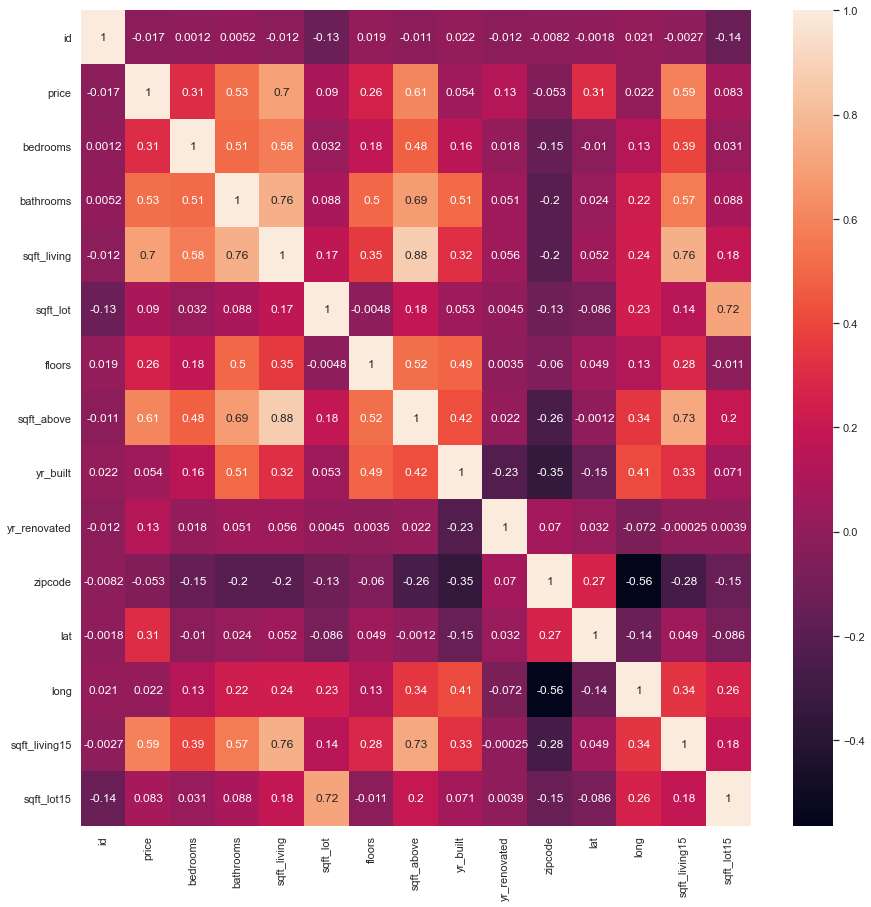

In [12]:
sns.set(rc={'figure.figsize': (15,15)})

sns.heatmap(df.corr(), annot = True);

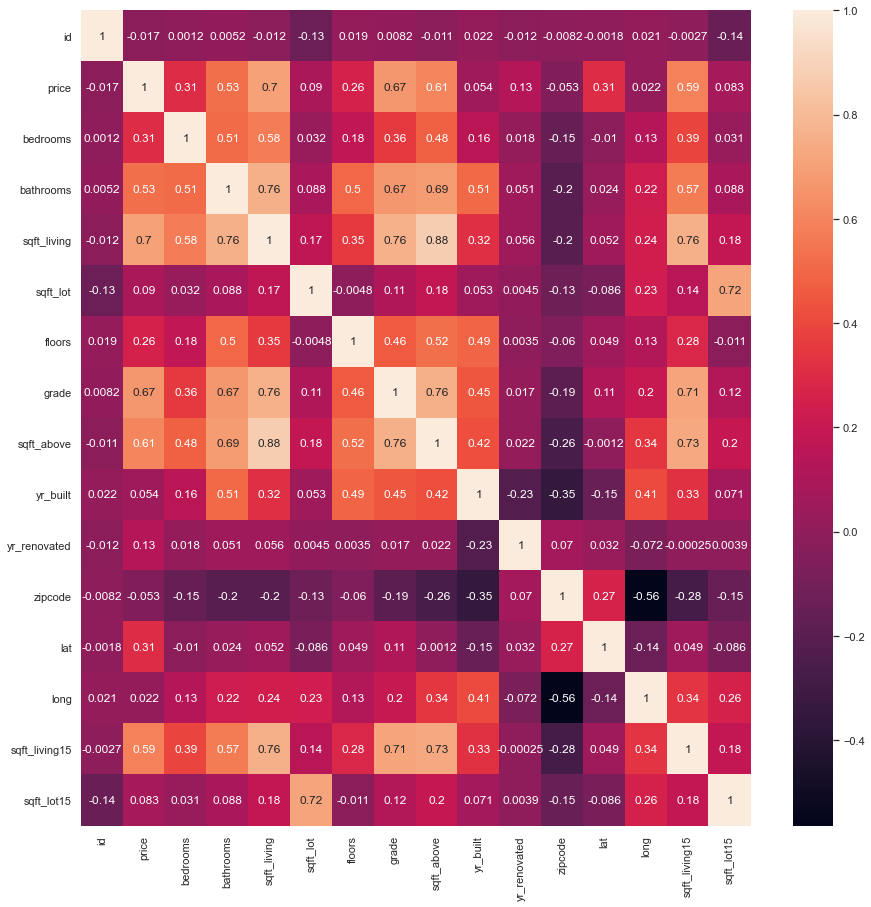

In [102]:
sns.set(rc={'figure.figsize': (15,15)})

sns.heatmap(df_copy.corr(), annot = True);

In [101]:
df_copy_corr = df_copy.corr()["price"].map(abs).sort_values(ascending = False)
df_copy_corr

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
bedrooms         0.308787
lat              0.306692
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
zipcode          0.053402
long             0.022036
id               0.016772
Name: price, dtype: float64

In [104]:
house_preds = df_copy[["sqft_living","grade"]]
house_target =  df_copy["price"]

In [106]:
lr = LinearRegression()
lr.fit(house_preds,house_target)

LinearRegression()

In [107]:
lr.score(house_preds,house_target)

0.534698840029157

In [113]:
lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select = 3)
ss = StandardScaler()
ss.fit(df_copy.drop(['price',"date","waterfront", "view", 
                     "condition", "sqft_basement", "yr_renovated"], axis =1))

df_copy_scaled = ss.transform(df_copy.drop(['price', "date", "waterfront", 
                                            "view", "condition", "sqft_basement", 
                                            "yr_renovated"], axis = 1))

In [114]:
select.fit(X=df_copy_scaled, y = df_copy["price"])

RFE(estimator=LinearRegression(), n_features_to_select=3)

In [115]:
select.support_

array([False, False, False,  True, False, False,  True, False,  True,
       False, False, False, False, False])

In [117]:
df_copy.drop(['price',"date","waterfront", "view", 
                     "condition", "sqft_basement", "yr_renovated"], axis =1)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,3,1.00,1180,5650,1.0,7,1180,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,3,2.25,2570,7242,2.0,7,2170,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2,1.00,770,10000,1.0,6,770,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,4,3.00,1960,5000,1.0,7,1050,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,3,2.00,1680,8080,1.0,8,1680,1987,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3,2.50,1530,1131,3.0,8,1530,2009,98103,47.6993,-122.346,1530,1509
21593,6600060120,4,2.50,2310,5813,2.0,8,2310,2014,98146,47.5107,-122.362,1830,7200
21594,1523300141,2,0.75,1020,1350,2.0,7,1020,2009,98144,47.5944,-122.299,1020,2007
21595,291310100,3,2.50,1600,2388,2.0,8,1600,2004,98027,47.5345,-122.069,1410,1287


In [118]:
house_preds = df_copy[["sqft_living","grade", 'yr_built']]
house_target =  df_copy["price"]
lr = LinearRegression()
lr.fit(house_preds,house_target)
lr.score(house_preds,house_target)

0.603540986693332

In [116]:
select.ranking_

array([11,  3,  4,  1, 10,  8,  1, 12,  1,  6,  2,  5,  7,  9])

In [109]:
endog = df_copy["price"]
exog = sm.add_constant(df_copy[["grade", "sqft_living"]])
lin_reg_model = sm.OLS(endog, exog)
lin_reg_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                 1.241e+04
Date:                Mon, 09 May 2022   Prob (F-statistic):               0.00
Time:                        11:41:08   Log-Likelihood:            -2.9913e+05
No. Observations:               21597   AIC:                         5.983e+05
Df Residuals:                   21594   BIC:                         5.983e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.028e+05   1.33e+04    -45.181      0.000   -6.29e+05   -5.77e+05
grade        9.925e+04   2247.784     44.155      0.000    9.48e+04    1.04e+05
sqft_living   184.1215      2.872     64.102      0.000     178.491     189.751
==============================================================================
Omnibus:                    16960.955   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1005795.090
Skew:                           3.304   Prob(JB):                         0.00
Kurtosis:                      35.773   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [110]:
endog = df_copy["price"]
exog = sm.add_constant(df_copy["grade"])
lin_reg_model = sm.OLS(endog, exog)
lin_reg_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 1.740e+04
Date:                Mon, 09 May 2022   Prob (F-statistic):               0.00
Time:                        11:41:15   Log-Likelihood:            -3.0101e+05
No. Observations:               21597   AIC:                         6.020e+05
Df Residuals:                   21595   BIC:                         6.020e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.061e+06   1.23e+04    -86.396      0.000   -1.09e+06   -1.04e+06
grade       2.092e+05   1585.790    131.895      0.000    2.06e+05    2.12e+05
==============================================================================
Omnibus:                    19879.964   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2043898.709
Skew:                           4.081   Prob(JB):                         0.00
Kurtosis:                      49.954   Cond. No.                         52.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
endog = df["price"]
exog = sm.add_constant(df["sqft_living"])
lin_reg_model = sm.OLS(endog, exog)

In [14]:
lin_reg_model.fit()

In [15]:
lin_reg_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Mon, 09 May 2022   Prob (F-statistic):               0.00
Time:                        10:36:48   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
endog = df["price"]
exog = sm.add_constant(df["sqft_living15"])
lin_reg_model = sm.OLS(endog, exog).fit()
lin_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                 1.125e+04
Date:                Mon, 09 May 2022   Prob (F-statistic):               0.00
Time:                        10:36:48   Log-Likelihood:            -3.0286e+05
No. Observations:               21597   AIC:                         6.057e+05
Df Residuals:                   21595   BIC:                         6.057e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8.303e+04   6216.659    -13.356      0.000   -9.52e+04   -7.08e+04
sqft_living15   313.7615      2.958    106.064      0.000     307.963     319.560
==============================================================================
Omnibus:                    20143.282   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1910578.895
Skew:                           4.207   Prob(JB):                         0.00
Kurtosis:                      48.303   Cond. No.                     6.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
endog = df["price"]
exog = sm.add_constant(df["bathrooms"])
lin_reg_model = sm.OLS(endog, exog).fit()
lin_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     8256.
Date:                Mon, 09 May 2022   Prob (F-statistic):               0.00
Time:                        10:36:48   Log-Likelihood:            -3.0389e+05
No. Observations:               21597   AIC:                         6.078e+05
Df Residuals:                   21595   BIC:                         6.078e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8712.6518   6224.769      1.400      0.162   -3488.356    2.09e+04
bathrooms   2.512e+05   2765.054     90.863      0.000    2.46e+05    2.57e+05
==============================================================================
Omnibus:                    17251.570   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           882735.889
Skew:                           3.452   Prob(JB):                         0.00
Kurtosis:                      33.550   Cond. No.                         7.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
endog = df["price"]
exog = sm.add_constant(df["bedrooms"])
lin_reg_model = sm.OLS(endog, exog).fit()
lin_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2276.
Date:                Mon, 09 May 2022   Prob (F-statistic):               0.00
Time:                        10:36:48   Log-Likelihood:            -3.0631e+05
No. Observations:               21597   AIC:                         6.126e+05
Df Residuals:                   21595   BIC:                         6.126e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.272e+05   8979.293     14.166      0.000     1.1e+05    1.45e+05
bedrooms    1.225e+05   2566.930     47.709      0.000    1.17e+05    1.27e+05
==============================================================================
Omnibus:                    18831.341   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1195104.832
Skew:                           3.900   Prob(JB):                         0.00
Kurtosis:                      38.598   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
endog = df["price"]
exog = sm.add_constant(df["sqft_above"])
lin_reg_model = sm.OLS(endog, exog).fit()
lin_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                 1.249e+04
Date:                Mon, 09 May 2022   Prob (F-statistic):               0.00
Time:                        10:36:48   Log-Likelihood:            -3.0246e+05
No. Observations:               21597   AIC:                         6.049e+05
Df Residuals:                   21595   BIC:                         6.049e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.976e+04   4737.581     12.613      0.000    5.05e+04     6.9e+04
sqft_above   268.6684      2.404    111.767      0.000     263.957     273.380
==============================================================================
Omnibus:                    16492.245   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           728366.432
Skew:                           3.265   Prob(JB):                         0.00
Kurtosis:                      30.691   Cond. No.                     4.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
df["price"].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [91]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [97]:
X = df_copy.drop(["price","date","waterfront", "view",
                  "condition", "sqft_basement", "yr_renovated"], axis = 1)
y = df.price

lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [98]:
y_hat= lr.predict(X)
sse = sum((y-y_hat)**2)
mse = sse/len(y)
rmse = np.sqrt(mse)

print(rmse)
print(np.sqrt(mean_squared_error(y, y_hat)))

214491.09210476198
214491.09210476154


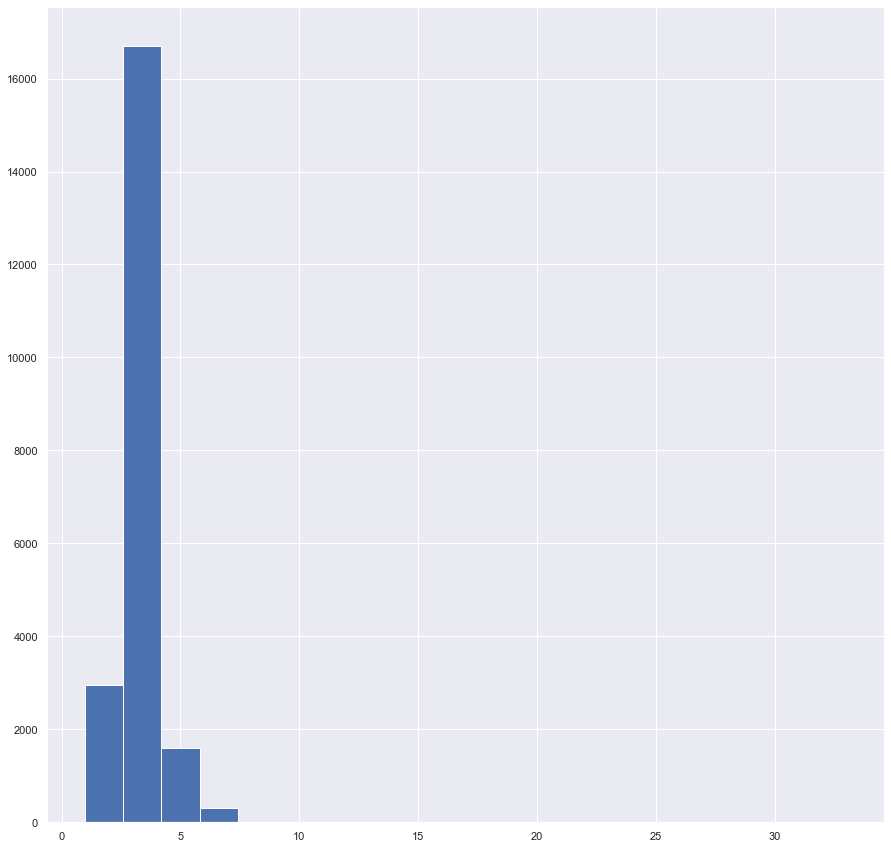

In [131]:
df_copy["bedrooms"].hist(bins=20);

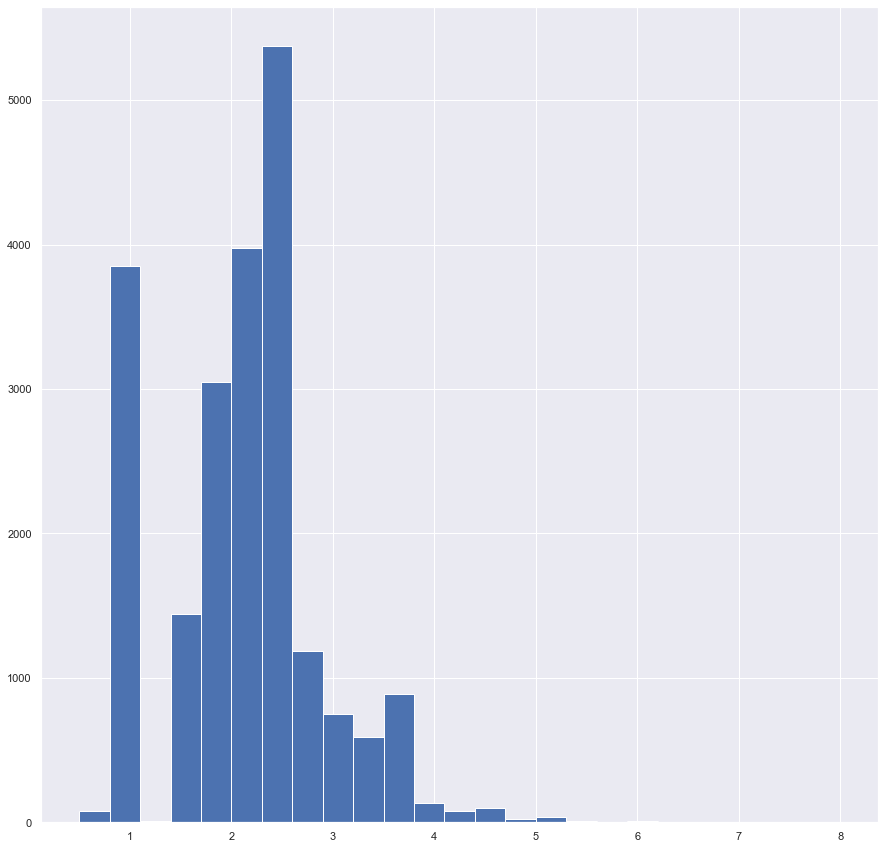

In [120]:
df_copy["bathrooms"].hist(bins=25);

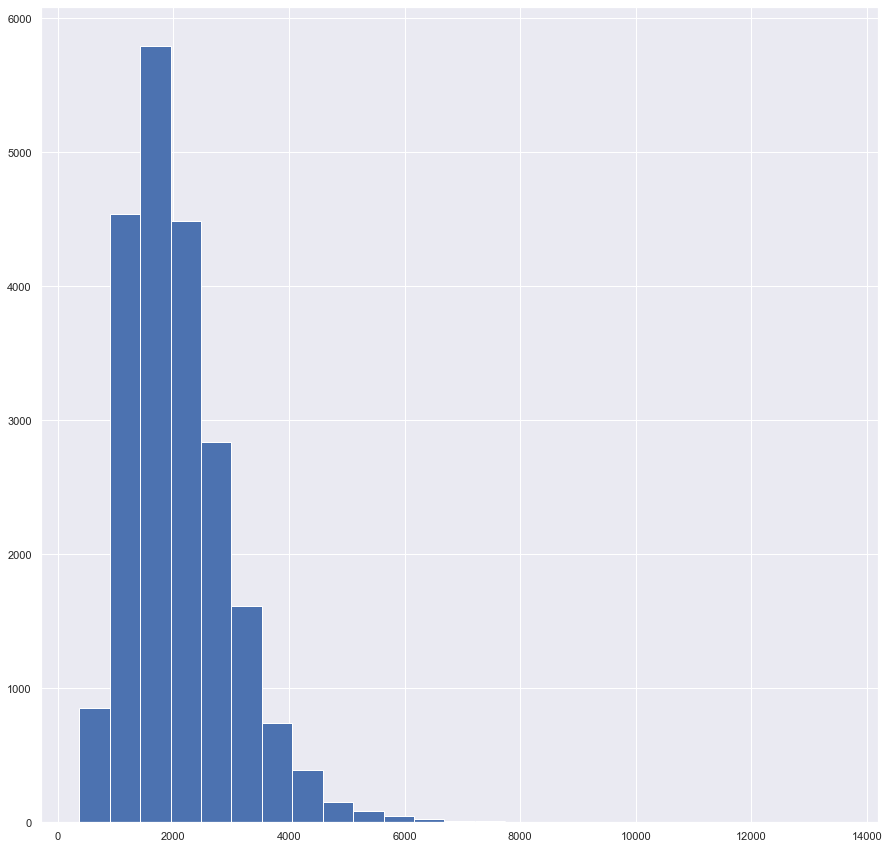

In [121]:
df_copy["sqft_living"].hist(bins=25);

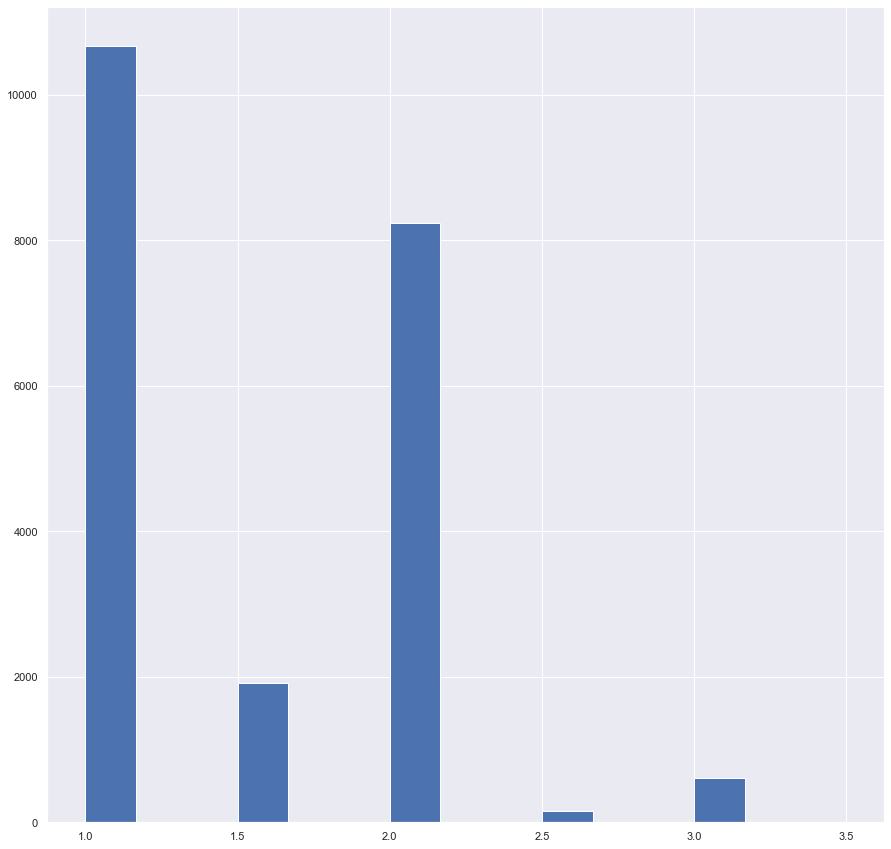

In [136]:
df_copy["floors"].hist(bins=15);

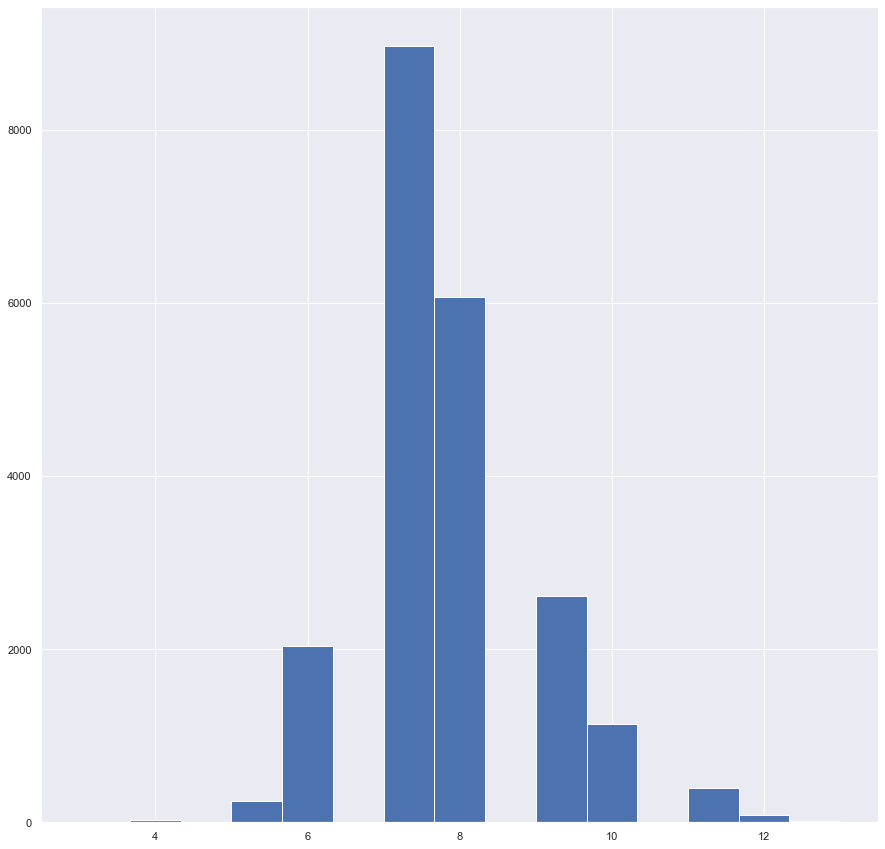

In [138]:
df_copy["grade"].hist(bins=15);

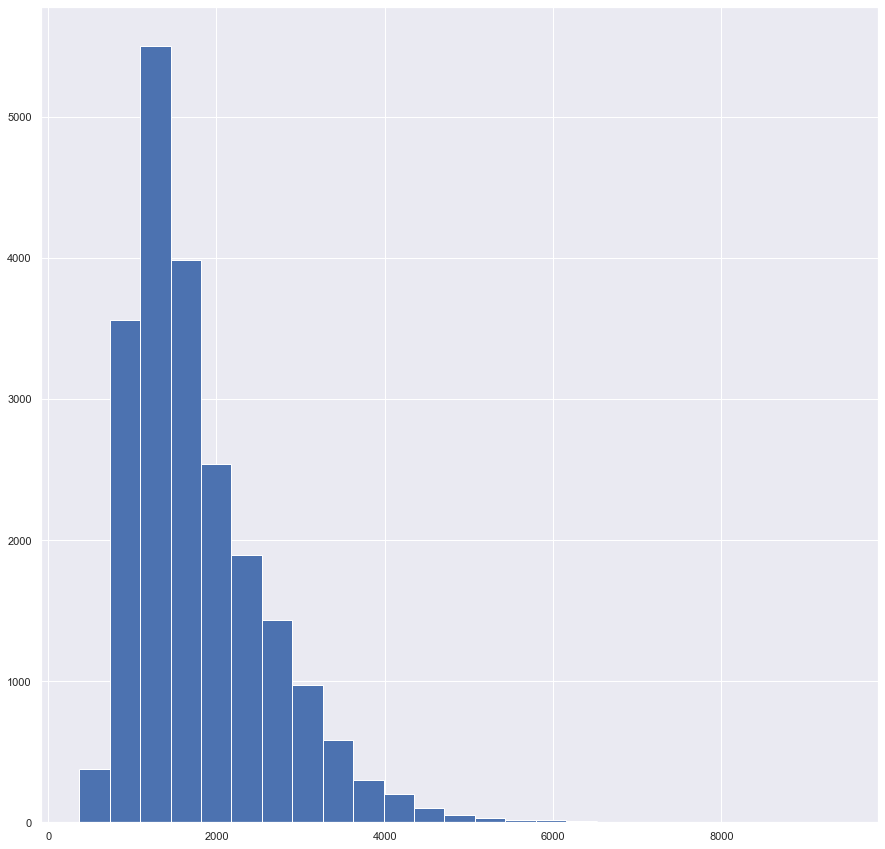

In [139]:
df_copy["sqft_above"].hist(bins=25);

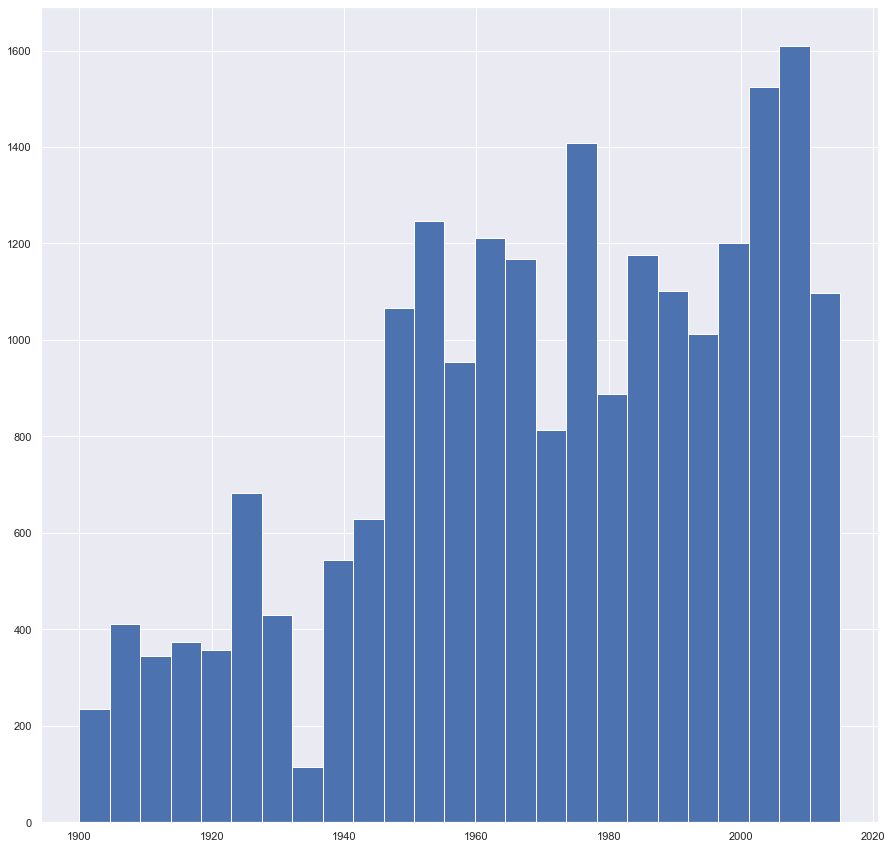

In [140]:
df_copy["yr_built"].hist(bins=25);

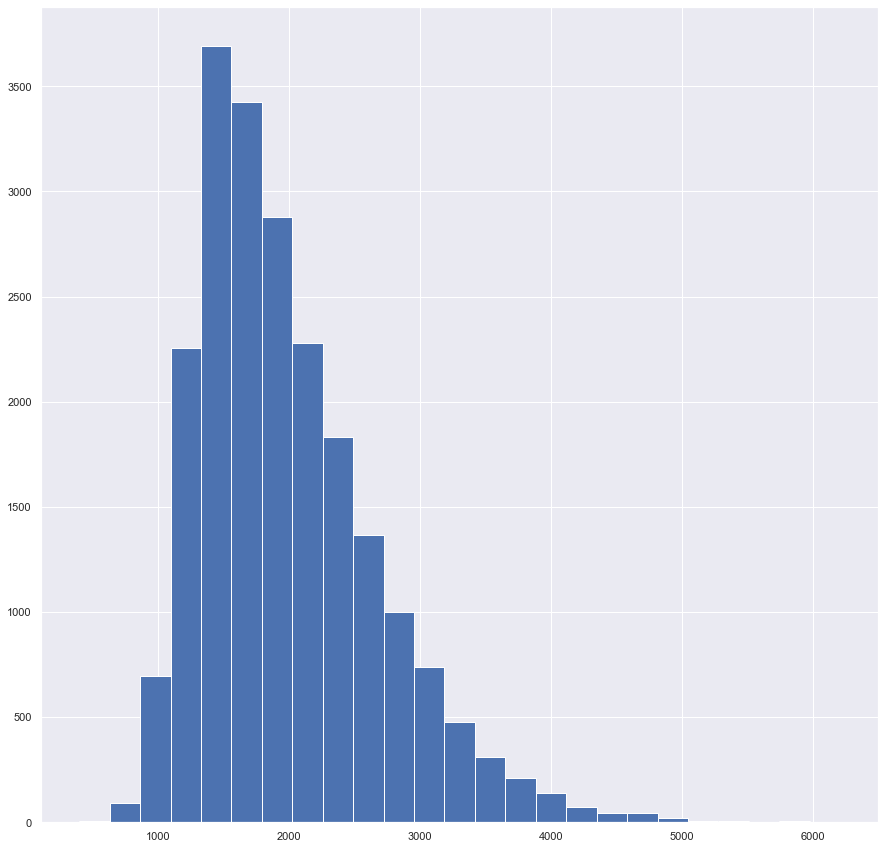

In [141]:
df_copy["sqft_living15"].hist(bins=25);

In [143]:
df_copy["bedrooms*bathrooms"] = df_copy["bedrooms"]*df_copy["bathrooms"]
df_copy.corr()["price"]["bedrooms*bathrooms"]

0.5168737954729824

In [144]:
pf = PolynomialFeatures(degree = 3)

X = df_copy.drop(['price',"date","waterfront", "view", 
                  "condition", "sqft_basement", "yr_renovated"], axis =1)
y  = df_copy["price"]

pf.fit(X)

PolynomialFeatures(degree=3)

In [145]:
pdf = pd.DataFrame(pf.transform(X), columns = pf.get_feature_names())
pdf

,1,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x12^3,x12^2 x13,x12^2 x14,x12 x13^2,x12 x13 x14,x12 x14^2,x13^3,x13^2 x14,x13 x14^2,x14^3
0,1.0,7.129301e+09,3.0,1.00,1180.0,5650.0,1.0,7.0,1180.0,1955.0,...,2.406104e+09,1.014514e+10,5386800.0,4.277615e+10,22713000.0,12060.000,1.803621e+11,9.576750e+07,50850.0000,27.000000
1,1.0,6.414100e+09,3.0,2.25,2570.0,7242.0,2.0,7.0,2170.0,1951.0,...,4.826809e+09,2.181775e+10,19278675.0,9.861880e+10,87141892.5,77000.625,4.457687e+11,3.938917e+08,348051.9375,307.546875
2,1.0,5.631500e+09,2.0,1.00,770.0,10000.0,1.0,6.0,770.0,1933.0,...,2.012365e+10,5.964590e+10,14796800.0,1.767887e+11,43857280.0,10880.000,5.239965e+11,1.299917e+08,32248.0000,8.000000
3,1.0,2.487201e+09,4.0,3.00,1960.0,5000.0,1.0,7.0,1050.0,1965.0,...,2.515456e+09,9.248000e+09,22195200.0,3.400000e+10,81600000.0,195840.000,1.250000e+11,3.000000e+08,720000.0000,1728.000000
4,1.0,1.954401e+09,3.0,2.00,1680.0,8080.0,1.0,8.0,1680.0,1987.0,...,5.832000e+09,2.430972e+10,19440000.0,1.013310e+11,81032400.0,64800.000,4.223815e+11,3.377701e+08,270108.0000,216.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1.0,2.630000e+08,3.0,2.50,1530.0,1131.0,3.0,8.0,1530.0,2009.0,...,3.581577e+09,3.532418e+09,17556750.0,3.483934e+09,17315775.0,86062.500,3.436115e+09,1.707811e+07,84881.2500,421.875000
21593,1.0,6.600060e+09,4.0,2.50,2310.0,5813.0,2.0,8.0,2310.0,2014.0,...,6.128487e+09,2.411208e+10,33489000.0,9.486720e+10,131760000.0,183000.000,3.732480e+11,5.184000e+08,720000.0000,1000.000000
21594,1.0,1.523300e+09,2.0,0.75,1020.0,1350.0,2.0,7.0,1020.0,2009.0,...,1.061208e+09,2.088083e+09,1560600.0,4.108610e+09,3070710.0,2295.000,8.084294e+09,6.042074e+06,4515.7500,3.375000
21595,1.0,2.913101e+08,3.0,2.50,1600.0,2388.0,2.0,8.0,1600.0,2004.0,...,2.803221e+09,2.558685e+09,14910750.0,2.335480e+09,13610025.0,79312.500,2.131747e+09,1.242277e+07,72393.7500,421.875000


In [146]:
pdf.shape

(21597, 816)

In [147]:
lr = LinearRegression()
lr.fit(pdf, y)
lr.score(pdf, y)

0.6243254306216592